In [0]:
!wget --header 'Host: docs.google.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://docs.google.com/spreadsheets/d/1r0k3IHvvLZLtdOVAQwt2dwQofuC5uS_idL-sLZ3jw5c/edit?usp=sharing&source=post_page---------------------------' --header 'DNT: 1' --header 'Cookie: S=apps-spreadsheets=eaA9-EI8tkK36M57yK32sZ1OO0W2Huo1; NID=188=YlD7oAGKYaDuNdCGuUhi23O7SOfEMWC3FsgIOYVoJuX0NyZ9_yzcSHKgXUToxDgtUvkzg_mQJyqXyITRM7n6zO2KA-cKM0Rs1JrvDLGepoJZXl23LEia-jU9yUukt3lbWCcVnHhJGj6Qo3uGjM4R8Na7w9hBzImLQsXycP9EEoHP5P603gqHzeyYKTkqreRO06TZEyt6qr5HL46w73vYOsMDHH17RPSdwrjcFeMwJYImsx8Im685exPQ; 1P_JAR=2019-7-31-10; OGP=-5061451:; CONSENT=YES+IN.en+20160828-16-0; ANID=AHWqTUmFxSnFWZZW7iNT-WImvJeWGuO9yYRfrFAPTUA7KD-AVxqCnmahMFkpPOZg; SID=mQe83embd5qeWZy_Ylu94JQYouinqzZKtD9rBxBkeem848JLIVZUMICSItceS8zb3RtkrA.; HSID=ANKVb56SN3sTta0Cc; SSID=ATnhLOg6LslXVAiN-; APISID=_kLaviQiV20B73Ez/AQ6lmfoxsCQ1psbLp; SAPISID=spMfFOGGOAvmC2uq/A82QspZ1hZhSLt3T3; SIDCC=AN0-TYtFPavAt3z4MLC6ZDq-LRt47Jca5KwDBkPtksx5RKtLqZXXOQNFMtPCJM3AJZNyKxRtgQ; S=billing-ui-v3=MyZbBZgBQ8S3QEuDMnmoaN3bSnjU7Vh-:billing-ui-v3-efe=MyZbBZgBQ8S3QEuDMnmoaN3bSnjU7Vh-' --header 'Upgrade-Insecure-Requests: 1' 'https://docs.google.com/spreadsheets/d/1r0k3IHvvLZLtdOVAQwt2dwQofuC5uS_idL-sLZ3jw5c/export?format=csv&id=1r0k3IHvvLZLtdOVAQwt2dwQofuC5uS_idL-sLZ3jw5c&gid=806989492' --output-document 'Internship_data - Internship_data.csv'

--2019-07-31 10:51:26--  https://docs.google.com/spreadsheets/d/1r0k3IHvvLZLtdOVAQwt2dwQofuC5uS_idL-sLZ3jw5c/export?format=csv&id=1r0k3IHvvLZLtdOVAQwt2dwQofuC5uS_idL-sLZ3jw5c&gid=806989492
Resolving docs.google.com (docs.google.com)... 74.125.141.101, 74.125.141.138, 74.125.141.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Internship_data - Internship_data.csv’

Internship_data - I     [ <=>                ]   1.20M  --.-KB/s    in 0.08s   

2019-07-31 10:51:27 (15.2 MB/s) - ‘Internship_data - Internship_data.csv’ saved [1262021]



In [0]:
!mv Internship_data\ -\ Internship_data.csv Internship_data.csv && ls

Internship_data.csv  sample_data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Imports

In [0]:
import numpy as np 
import pandas as pd 
import sys, requests, shutil, os
from urllib import request, error
from tqdm import tqdm_notebook as tqdm
from pathlib import Path

In [0]:
from fastai.vision import *

### Dataset Preparation

In [0]:
print(os.listdir("./"))
data=pd.read_csv('./Internship_data.csv')
data.head(5)

['.config', 'Internship_data.csv', 'sample_data']


,id,view_1,view_2,view_3,view_4,view_5,class
0,3213e9e9da734c268db6bed4b76ea411.jpg,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,zipper
1,3a4e9c2704bb46afb5a43c3231974e04.jpg,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,zipper
2,48d93cb06ede452fbab83495a4ff17a6.jpg,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,zipper
3,c7d91a112c6341eb84ed8e62ea4d6aa8.jpg,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,zipper
4,5cb6f2cdd3a244af9d9640be6e65b4f0.jpg,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,https://vision-images-store.s3.amazonaws.com/i...,zipper


In [0]:
!rm -rf fynd

In [0]:
# os.makedirs('./fynd/train/', exist_ok=True)
print(os.listdir())

['.config', 'drive', 'sample_data']


In [0]:
def fetch_image(link):
    url=link
    response=requests.get(url, stream=True)
    with open('./train/image.jpg', 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

def get_all_imgs(link, i):
    os.makedirs('./fynd/train/'+data['class'][i], exist_ok=True)
    fetch_image(link)
    os.rename('./fynd/train/image.jpg', './fynd/train/'+ data['class'][i]+'/'+data['id'][i])


# for i, (link1, link2, link3, link4, link5) in enumerate(tqdm(zip(data['view_1'], data['view_2'], data['view_3'], data['view_4'], data['view_5']), total=int(len(data)))):
#     get_all_imgs(link1, i)
#     get_all_imgs(link2, i)
#     get_all_imgs(link3, i)
#     get_all_imgs(link4, i)
#     get_all_imgs(link5, i)    
    
for i, link1 in enumerate(tqdm(data['view_1'], total=int(len(data)))):
    get_all_imgs(link1, i) 

In [0]:
!cp -r "/content/drive/My Drive/fynd" ./ && ls fynd/train/

 backstrap   buckle  'hook&look'   lace_up   slip_on   zipper


In [0]:
fynd_path = Path('fynd/')
fynd_path

PosixPath('fynd')

In [0]:
# finding mean and std of data using online mean&std
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader


def online_mean_and_sd(loader):
    """Compute the mean and sd in an online fashion

        Var[x] = E[X^2] - E^2[X]
    """
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:

        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

        cnt += nb_pixels

    return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)
  
  
TRAIN_PATH = "./fynd/train/"
bs = 64

train_tfms = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(), 
            transforms.ToTensor() 
           # don't use transforms.Normalize() for the first time
        ])
train_ds = datasets.ImageFolder(root=TRAIN_PATH, transform=train_tfms)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

food101_mean, food101_std = online_mean_and_sd(train_dl)
print(food101_mean, food101_std)


tensor([0.7843, 0.7677, 0.7611]) tensor([0.3087, 0.3198, 0.3239])


In [0]:
fynd_stats = [(0.7843, 0.7677, 0.7611), (0.3087, 0.3198, 0.3239)]
tfms = get_transforms(do_flip=False)
fynd_data = ImageDataBunch.from_folder(fynd_path, ds_tfms=tfms, size=224, bs=64, valid_pct=0.2).normalize(fynd_stats)

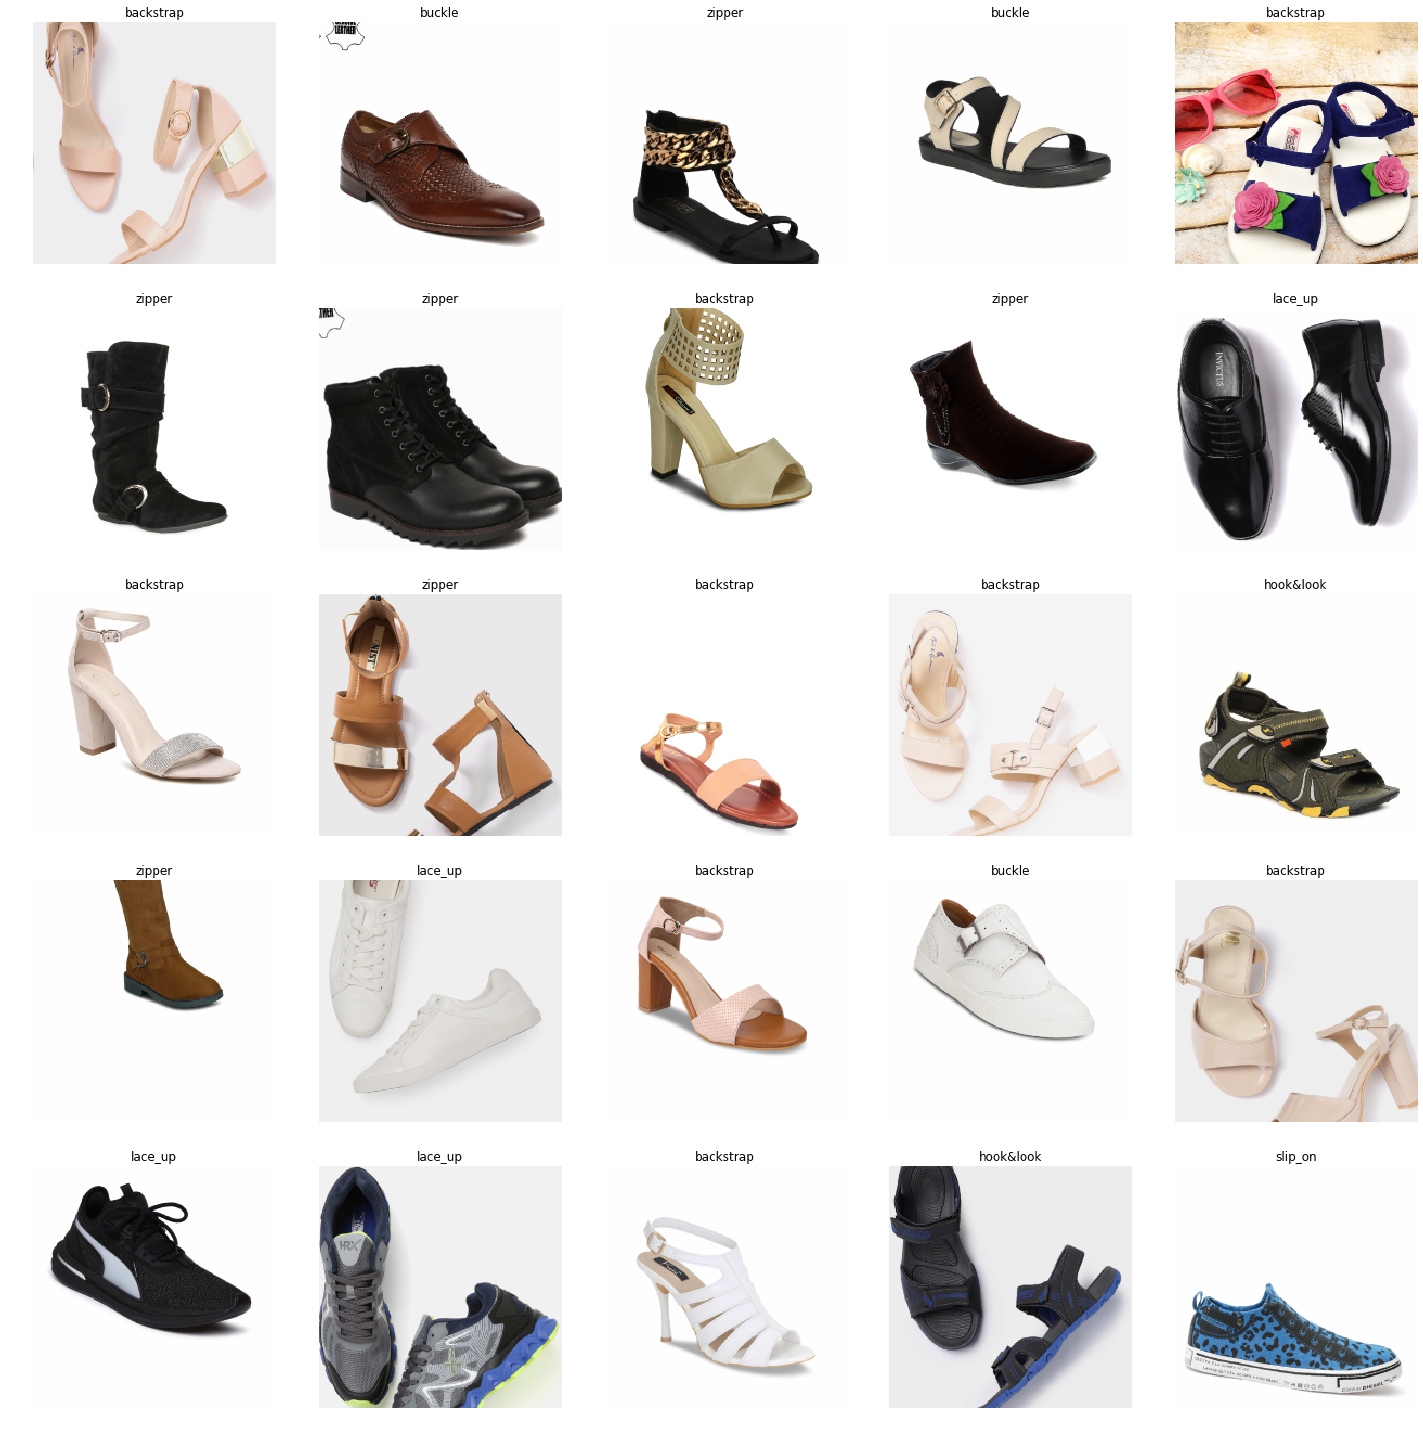

In [0]:
fynd_data.show_batch()

In [0]:
fynd_data.classes

['backstrap', 'buckle', 'hook&look', 'lace_up', 'slip_on', 'zipper']

In [0]:
len(fynd_data.train_ds.x),len(fynd_data.valid_ds.x),fynd_data.c

(1724, 431, 6)

In [0]:
learn = cnn_learner(fynd_data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 80588899.72it/s]


In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.115833,0.589538,0.819026,01:47
1,0.768055,0.505541,0.851508,01:45
2,0.560761,0.475125,0.858469,01:44


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


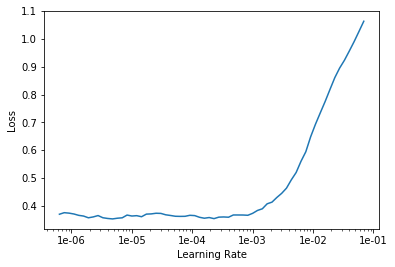

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('resnet50-stage-1')

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.367394,0.438368,0.865429,01:45
1,0.335167,0.418968,0.874710,01:45
2,0.308250,0.412687,0.872390,01:44


In [0]:
learn.save('resnet50-stage-2')

### Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

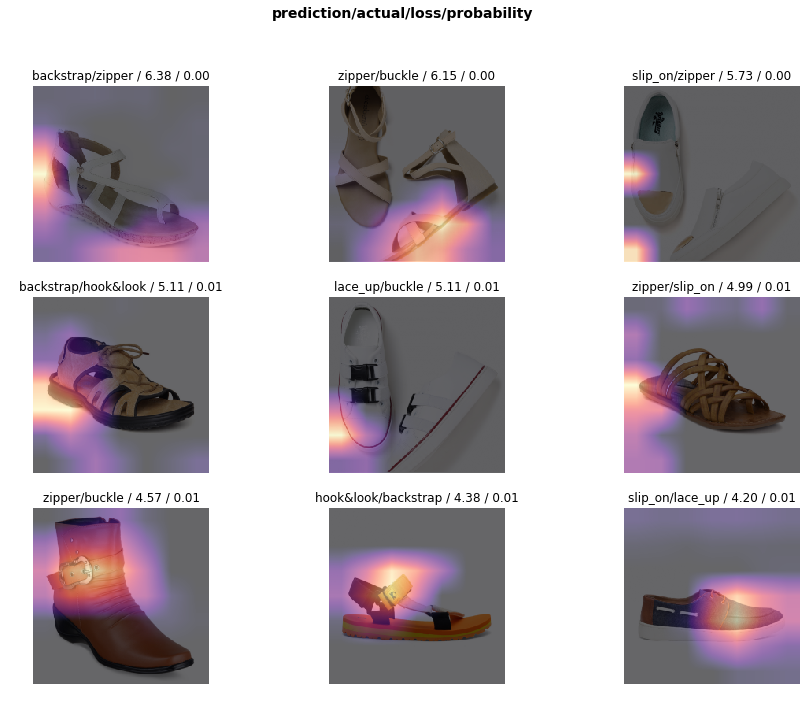

In [0]:
interp.plot_top_losses(9, figsize=(15, 11))

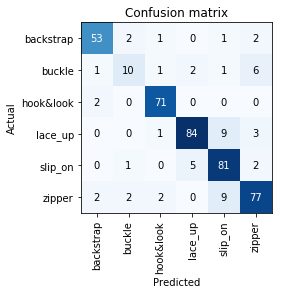

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=3)

[('lace_up', 'slip_on', 9),
 ('zipper', 'slip_on', 9),
 ('buckle', 'zipper', 6),
 ('slip_on', 'lace_up', 5),
 ('lace_up', 'zipper', 3)]

### Train for more epochs

In [0]:
learn.load('resnet50-stage-2')

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.261656,0.445418,0.874710,01:45
1,0.258335,0.448780,0.877030,01:46
2,0.245797,0.445281,0.874710,01:45
3,0.239464,0.430689,0.874710,01:43
4,0.227511,0.429758,0.874710,01:44
5,0.213647,0.428087,0.872390,01:43
6,0.211681,0.431066,0.874710,01:42
7,0.206997,0.424253,0.874710,01:42


In [0]:
learn.save('resnet50-stage-2_11')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

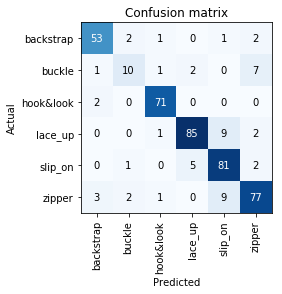

In [0]:
interp.plot_confusion_matrix()

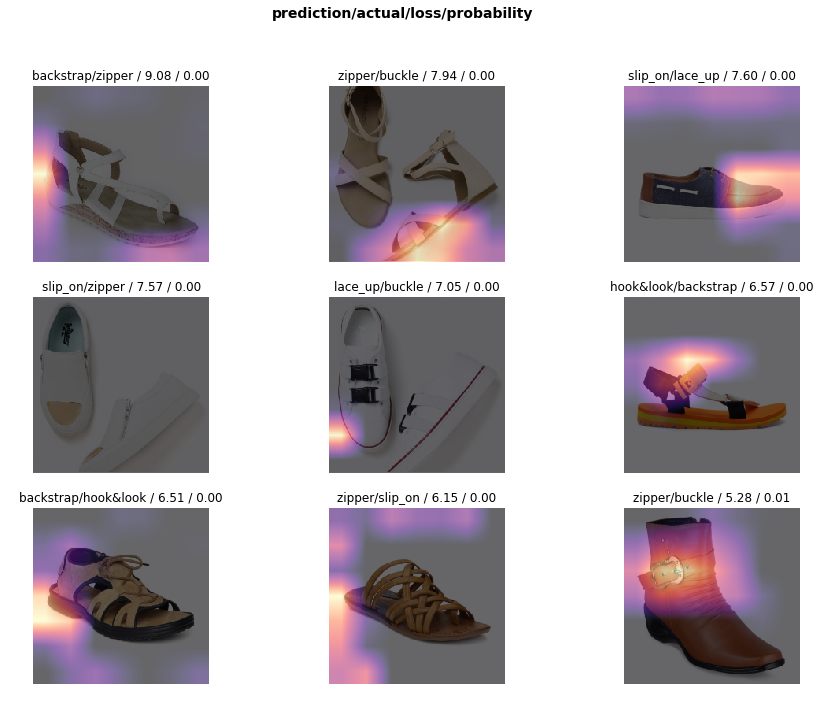

In [0]:
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
interp.most_confused(min_val=3)

[('lace_up', 'slip_on', 9),
 ('zipper', 'slip_on', 9),
 ('buckle', 'zipper', 7),
 ('slip_on', 'lace_up', 5),
 ('zipper', 'backstrap', 3)]

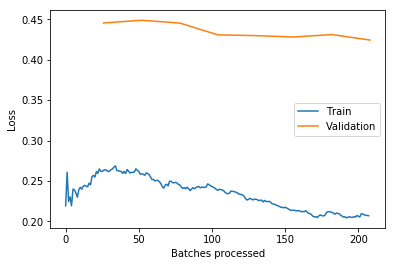

In [0]:
learn.recorder.plot_losses()